In [1]:
#Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from RainySeason import *
from utils import *

mpl_settings()
paper_plot()

In [2]:
data = pd.read_csv('./inputs/Calibration_precip_ts.csv',index_col=0,parse_dates=True,dayfirst=True)
lsp = pd.read_csv('./inputs/LSP_targets.csv',index_col=0,parse_dates=True)

This timeseries is:  True
05 24.12101841572542
This timeseries is:  True
06 19.676800313776507
This timeseries is:  True
07 20.281837716944455
This timeseries is:  True
08 47.53141376098176
This timeseries is:  True
09 60.03008505000731


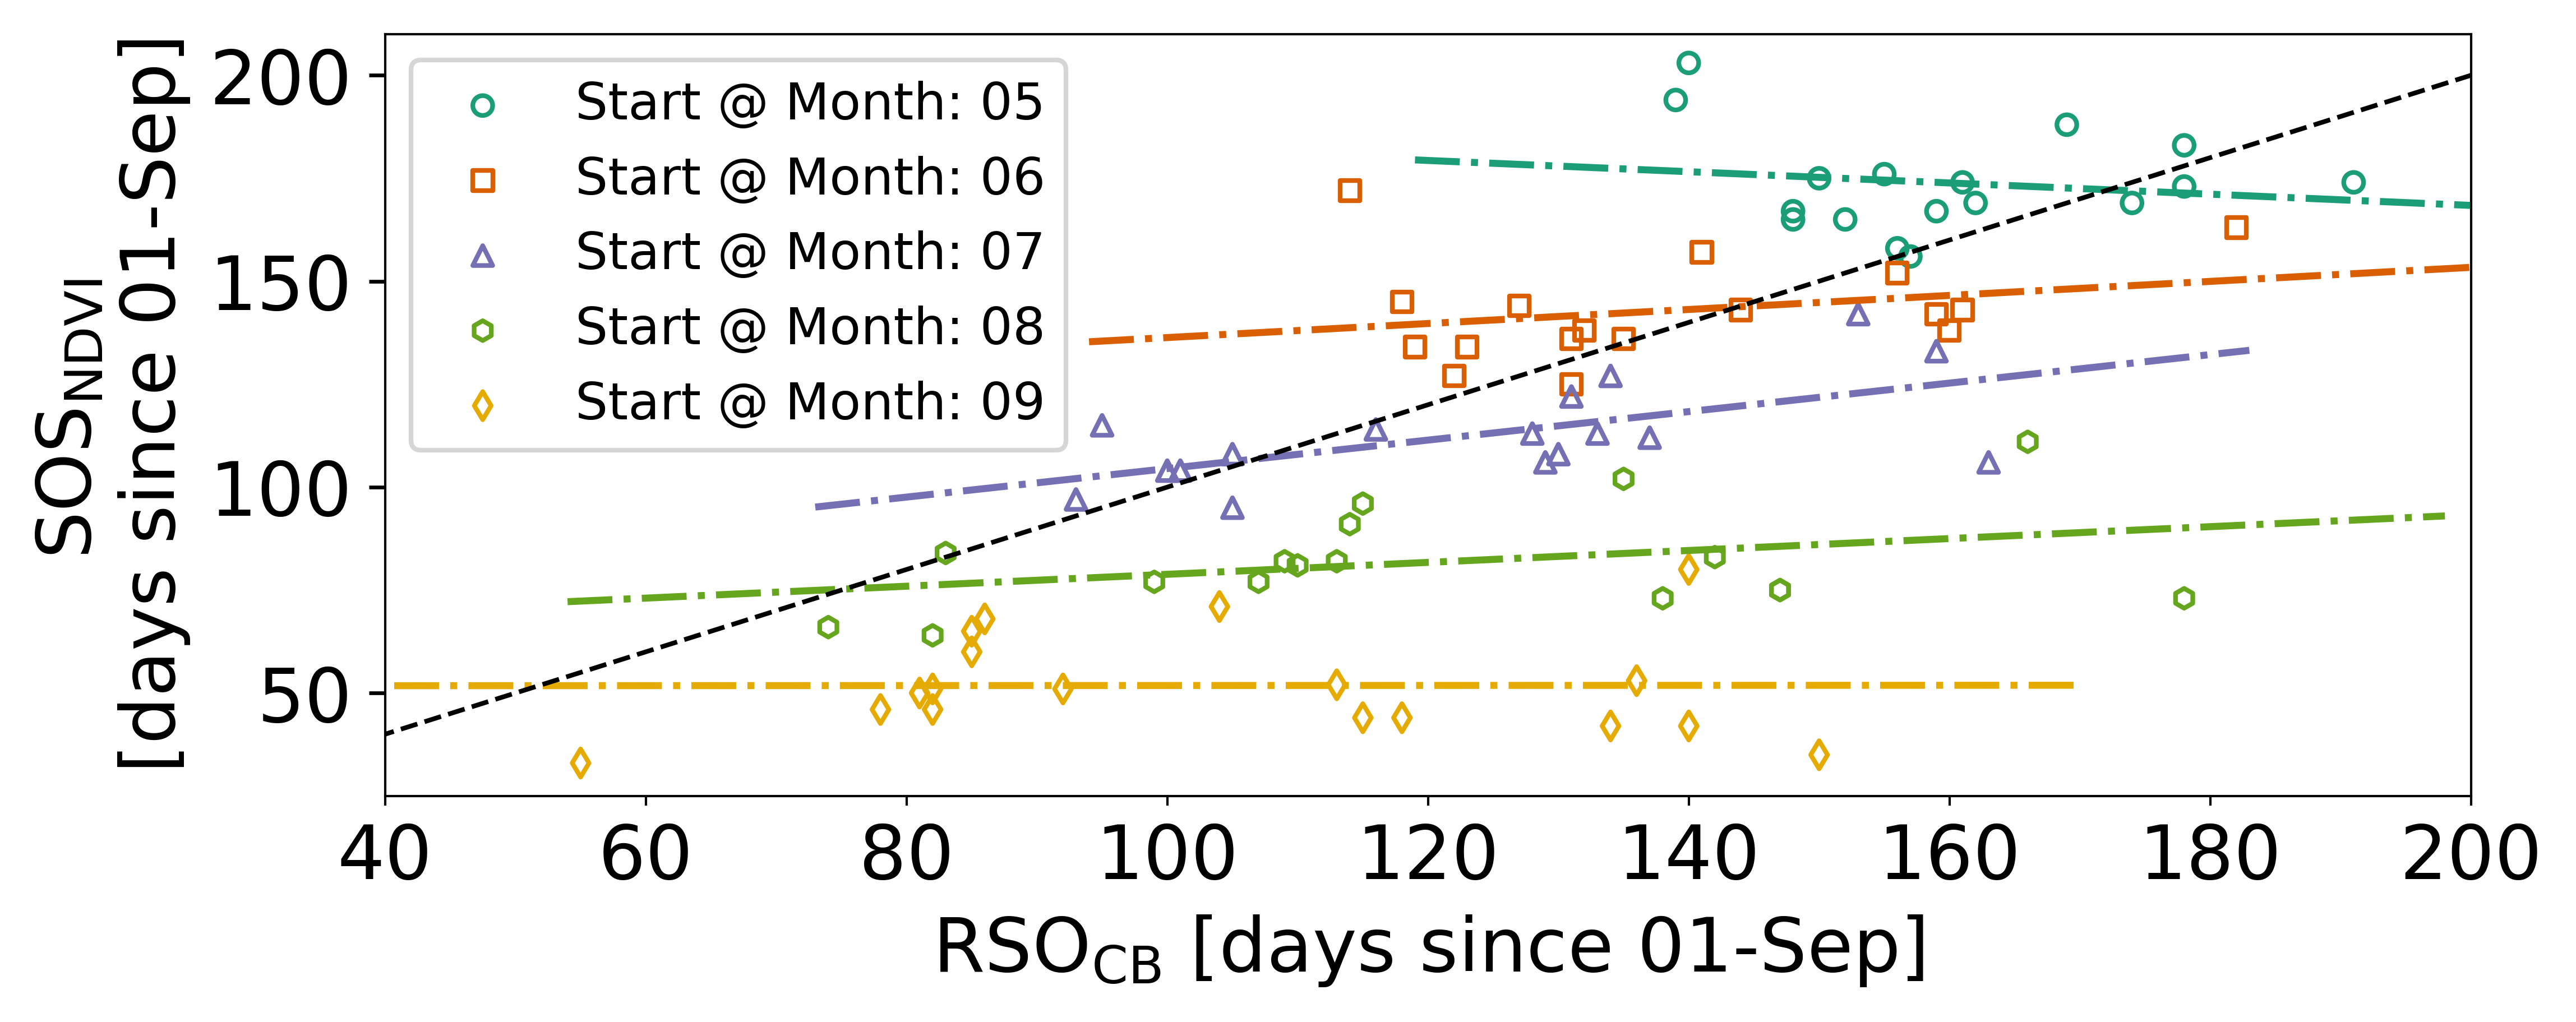

In [3]:
plt.figure(figsize=(8,3),dpi=600)
colors = iter(plt.get_cmap('Dark2')(np.linspace(0,1,7)))
markers = iter(["o","s","^",'h','d',"*"])

for mo in ['05','06','07','08','09']:

    ts = prepare_ts(data['WRF'], start_month=mo, year_s=None, year_e=None)
    diff = np.datetime64('2000-09-01') - np.datetime64(f'2000-{mo}-01') 
    s, e = str(ts.index.year[0]),str(ts.index.year[-1])
    SOS = lsp['SOS_no_lag'].loc[s:e] - lsp['lag_WRF'].loc[s:e]
    SOS = SOS.values + diff.astype(int)
    Onset = CookBuckley_2phase(ts)[0]
    print(mo,rsme(Onset,SOS))
    c = next(colors)
    plt.scatter(Onset,SOS,ec=c,fc='none',marker=next(markers),s=18,label=f'Start @ Month: {mo}')
    polyline(Onset,SOS,c=c)
    
points = np.linspace(0, 250, 100)
plt.gca().plot(points, points, color='k', marker=None,
        linestyle='--', linewidth=1.0)  

plt.xlim(40,200)
plt.ylim(25,210)

plt.ylabel('$SOS_{NDVI}$ \n [days since 01-Sep]')
plt.xlabel('$RSO_{CB}$ [days since 01-Sep]')

plt.legend()

plt.savefig('./figures/FigS3a.pdf',bbox_inches='tight')

This timeseries is:  True
06 46.68921024113791
This timeseries is:  True
07 47.4465643707554
This timeseries is:  True
08 46.091341537276634
This timeseries is:  True
09 35.32704346531139


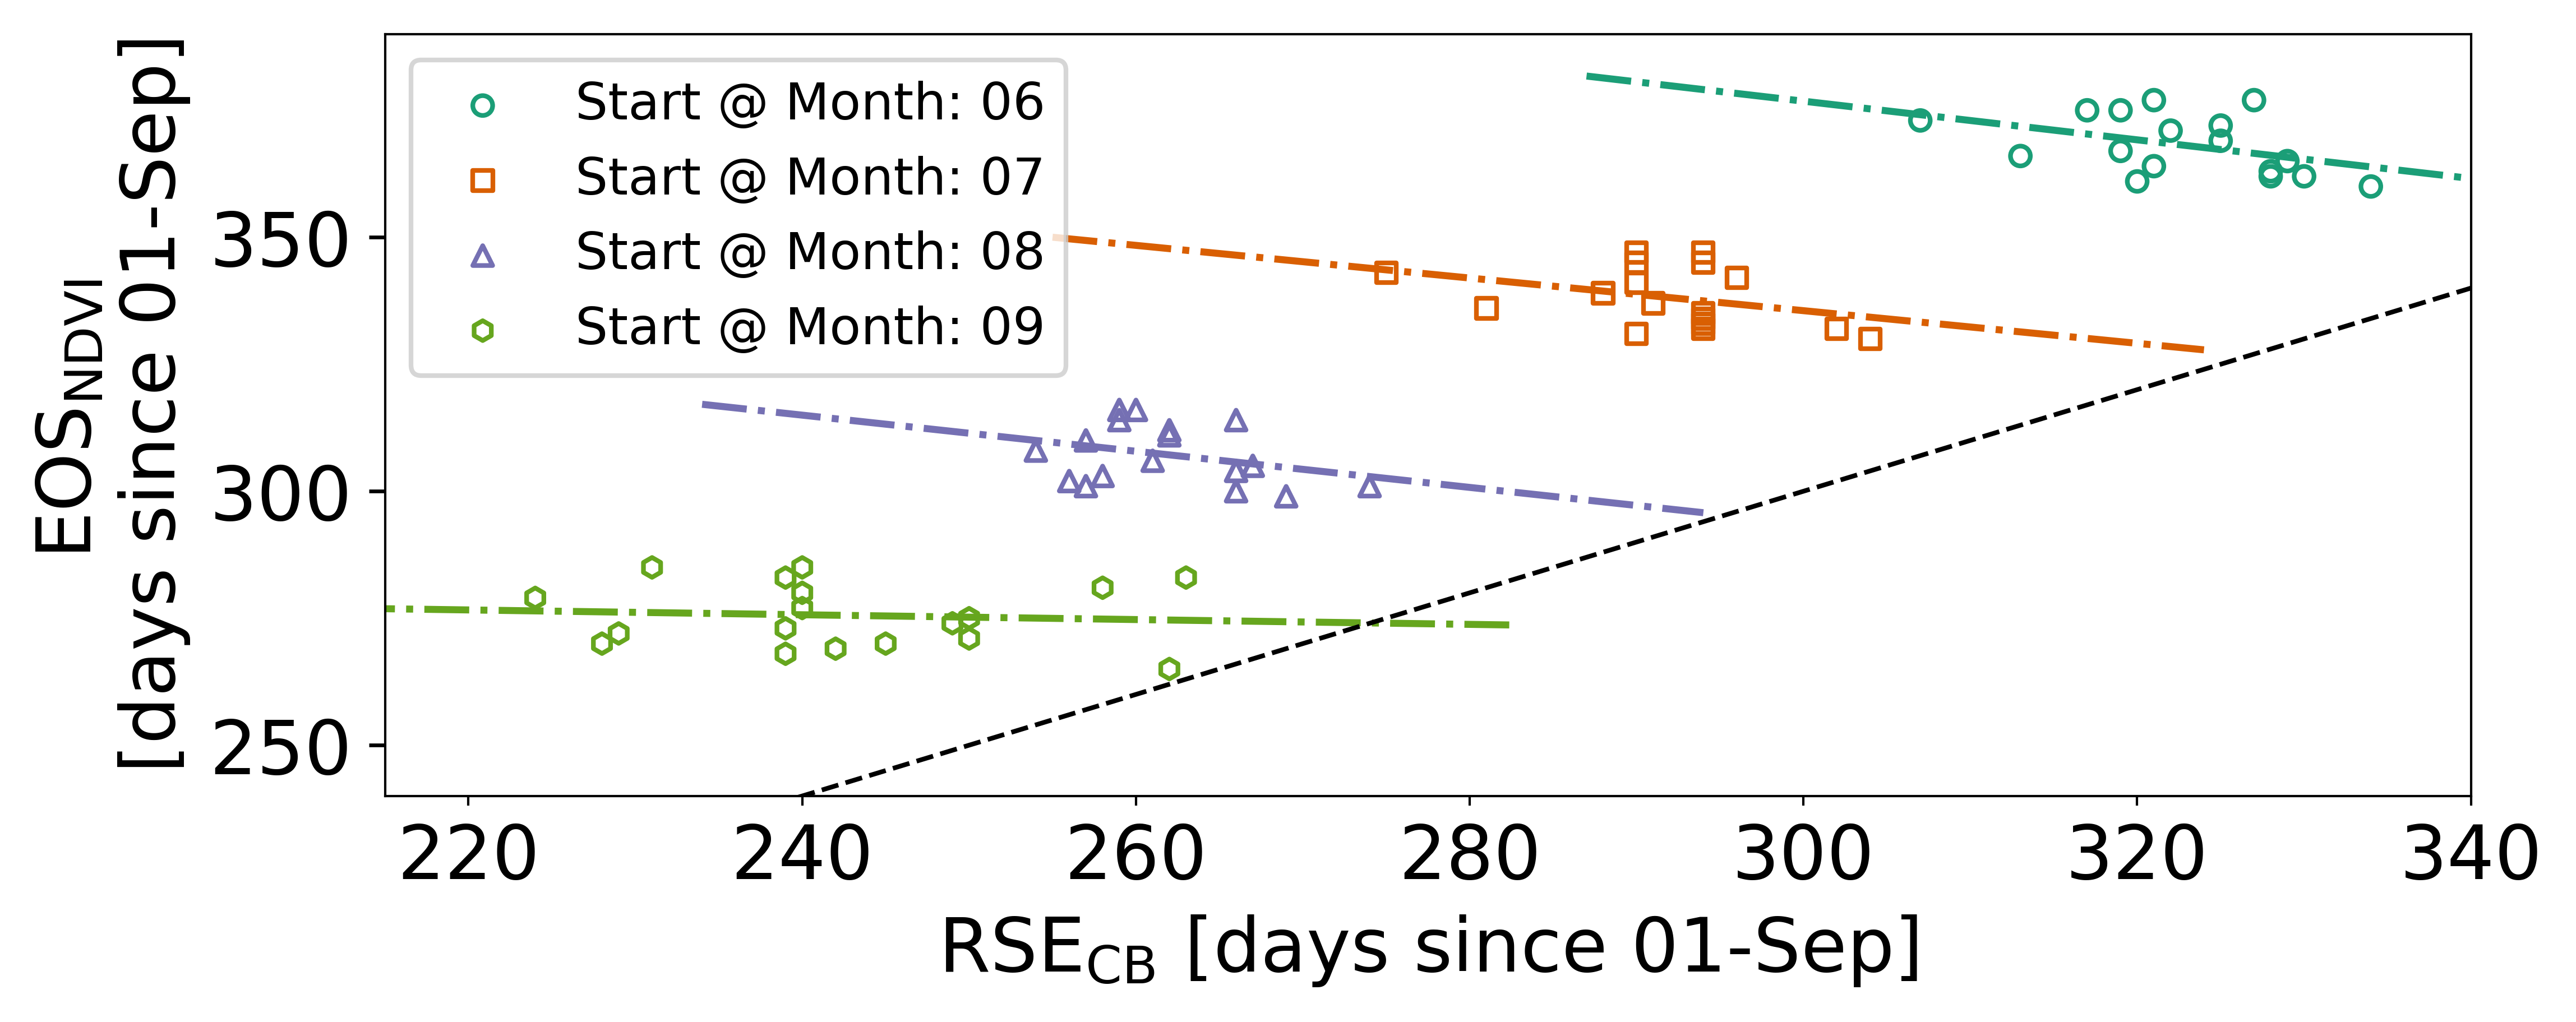

In [4]:
plt.figure(figsize=(8,3),dpi=600)
colors = iter(plt.get_cmap('Dark2')(np.linspace(0,1,7)))
markers = iter(["o","s","^",'h','d',"*"])

for mo in ['06','07','08','09']:

    ts = prepare_ts(data['WRF'], start_month=mo, year_s=None, year_e=None)
    diff = np.datetime64('2000-09-01') - np.datetime64(f'2000-{mo}-01') 
    s, e = str(ts.index.year[0]),str(ts.index.year[-1])
    EOS = lsp['EOS_no_lag'].loc[s:e] - lsp['lag_WRF'].loc[s:e]
    EOS = EOS.values + diff.astype(int)
    End = CookBuckley_2phase(ts)[1]
    print(mo,rsme(End,EOS))
    c = next(colors)
    plt.scatter(End,EOS,ec=c,fc='none',marker=next(markers),s=18,label=f'Start @ Month: {mo}')
    polyline(End,EOS,c=c)
    
points = np.linspace(200, 375, 100)
plt.gca().plot(points, points, color='k', marker=None,
        linestyle='--', linewidth=1.0)  

plt.xlim(215,340)
plt.ylim(240,390)


plt.ylabel('$EOS_{NDVI}$ \n [days since 01-Sep]')
plt.xlabel('$RSE_{CB}$ [days since 01-Sep]')

plt.legend()

plt.savefig('./figures/FigS3b.pdf',bbox_inches='tight')